In [5]:
import csv
import numpy as np
import pandas as pd
chinese = pd.read_csv('/Users/tina/Desktop/10_중국인 관광객 타겟 마케팅을 위한 활용 데이터.csv',  encoding = "cp949")
chinese

,년월,이용자 구분,시도명,읍면동명,업종,방문인구,이용자수,이용금액,데이터기준일자
0,2018-01,중국인관광객,서귀포시,남원읍,쇼핑,179846.027,744,4.836000e+06,2020-12-15
1,2018-01,중국인관광객,제주시,연동,문화/레져,632381.932,744,3.943200e+06,2020-12-15
2,2018-01,중국인관광객,제주시,연동,소매,632381.932,2240928,5.050000e+11,2020-12-15
3,2018-01,중국인관광객,제주시,연동,쇼핑,632381.932,5039112,4.770000e+12,2020-12-15
4,2018-01,중국인관광객,제주시,연동,숙박,632381.932,178560,3.124794e+10,2020-12-15
...,...,...,...,...,...,...,...,...,...
2136,2018-12,중국인관광객,서귀포시,표선면,문화/레져,64744.126,4464,2.663520e+08,2020-12-15
2137,2018-12,중국인관광객,서귀포시,표선면,소매,64744.126,400272,1.080000e+11,2020-12-15
2138,2018-12,중국인관광객,서귀포시,표선면,쇼핑,64744.126,5952,1.702198e+08,2020-12-15
2139,2018-12,중국인관광객,제주시,삼도1동,소매,18223.999,3720,6.276384e+08,2020-12-15


In [7]:
chinese
chinese_data=chinese.sort_values('읍면동명')
chinese_data
c=chinese_data[chinese_data['업종']=='교통'].index
c_=chinese_data.drop(c)
ch=chinese_data[chinese_data['업종']=='기타'].index
c__=c_.drop(ch)
chi=chinese_data[chinese_data['업종']=='유흥'].index
c___=c__.drop(chi)
chin=chinese_data[chinese_data['업종']=='전체'].index
china_=c___.drop(chin)
chinaa=chinese_data[chinese_data['업종']=='쇼핑'].index
chinaaa=china_.drop(chinaa)
chinaaa

,년월,이용자 구분,시도명,읍면동명,업종,방문인구,이용자수,이용금액,데이터기준일자
451,2018-03,중국인관광객,제주시,건입동,소매,41096.785,9646,1.386130e+09,2020-12-15
109,2018-01,중국인관광객,제주시,건입동,숙박,30589.440,7440,1.182320e+09,2020-12-15
439,2018-03,중국인관광객,제주시,건입동,숙박,41096.785,14098,3.740186e+09,2020-12-15
440,2018-03,중국인관광객,제주시,건입동,식음료,41096.785,88298,6.216105e+09,2020-12-15
1376,2018-08,중국인관광객,제주시,건입동,숙박,104140.473,49848,1.334849e+10,2020-12-15
...,...,...,...,...,...,...,...,...,...
1372,2018-08,중국인관광객,서귀포시,효돈동,식음료,3158.742,1084,9.051400e+06,2020-12-15
1773,2018-10,중국인관광객,서귀포시,효돈동,식음료,8660.580,1442,4.542300e+07,2020-12-15
270,2018-02,중국인관광객,서귀포시,효돈동,소매,2332.337,468,7.956000e+06,2020-12-15
271,2018-02,중국인관광객,서귀포시,효돈동,식음료,2332.337,936,1.591200e+07,2020-12-15


In [8]:
china=chinaaa.groupby(['읍면동명','업종'])["이용금액"].sum()
china
china1=chinaaa.groupby(['읍면동명','업종'])["이용자수"].sum()
china1

읍면동명  업종   
건입동   문화/레져       3672
      소매        474982
      숙박        398170
      식음료      2319554
구좌읍   문화/레져      41928
                ...   
한림읍   식음료       337752
화북동   소매          1464
      식음료         5603
효돈동   소매          2187
      식음료         8580
Name: 이용자수, Length: 150, dtype: int64

In [9]:
china_dataframe=pd.concat([china,china1], axis=1)
china_dataframe
china_dataframe['1인당 이용금액']=china_dataframe['이용금액']/china_dataframe['이용자수']
china_dataframe

이용금액     이용자수       1인당 이용금액
읍면동명 업종                                         
건입동  문화/레져  2.236200e+08     3672   60898.692810
     소매     9.419984e+10   474982  198322.972660
     숙박     1.155397e+11   398170  290176.770837
     식음료    1.671060e+11  2319554   72042.281283
구좌읍  문화/레져  2.758987e+09    41928   65802.976531
...                  ...      ...            ...
한림읍  식음료    1.387499e+10   337752   41080.416400
화북동  소매     7.584000e+07     1464   51803.278689
     식음료    3.236150e+08     5603   57757.451365
효돈동  소매     2.932800e+07     2187   13410.150892
     식음료    2.802216e+08     8580   32659.860140

[150 rows x 3 columns]

In [11]:
china_df= pd.read_csv('/Users/tina/Desktop/10_중국인 관광객 타겟 마케팅을 위한 활용 데이터.csv',  encoding = "cp949")
china_df

,년월,이용자 구분,시도명,읍면동명,업종,방문인구,이용자수,이용금액,데이터기준일자
0,2018-01,중국인관광객,서귀포시,남원읍,쇼핑,179846.027,744,4.836000e+06,2020-12-15
1,2018-01,중국인관광객,제주시,연동,문화/레져,632381.932,744,3.943200e+06,2020-12-15
2,2018-01,중국인관광객,제주시,연동,소매,632381.932,2240928,5.050000e+11,2020-12-15
3,2018-01,중국인관광객,제주시,연동,쇼핑,632381.932,5039112,4.770000e+12,2020-12-15
4,2018-01,중국인관광객,제주시,연동,숙박,632381.932,178560,3.124794e+10,2020-12-15
...,...,...,...,...,...,...,...,...,...
2136,2018-12,중국인관광객,서귀포시,표선면,문화/레져,64744.126,4464,2.663520e+08,2020-12-15
2137,2018-12,중국인관광객,서귀포시,표선면,소매,64744.126,400272,1.080000e+11,2020-12-15
2138,2018-12,중국인관광객,서귀포시,표선면,쇼핑,64744.126,5952,1.702198e+08,2020-12-15
2139,2018-12,중국인관광객,제주시,삼도1동,소매,18223.999,3720,6.276384e+08,2020-12-15


In [12]:
china_df
chinese_data=china_df.sort_values('읍면동명')
chinese_data
c=chinese_data[chinese_data['업종']=='교통'].index
c_=chinese_data.drop(c)
ch=chinese_data[chinese_data['업종']=='기타'].index
c__=c_.drop(ch)
chi=chinese_data[chinese_data['업종']=='유흥'].index
c___=c__.drop(chi)
chin=chinese_data[chinese_data['업종']=='전체'].index
china_=c___.drop(chin)
chinaa=chinese_data[chinese_data['업종']=='쇼핑'].index
chinaaa=china_.drop(chinaa)
chinaaa

,년월,이용자 구분,시도명,읍면동명,업종,방문인구,이용자수,이용금액,데이터기준일자
451,2018-03,중국인관광객,제주시,건입동,소매,41096.785,9646,1.386130e+09,2020-12-15
109,2018-01,중국인관광객,제주시,건입동,숙박,30589.440,7440,1.182320e+09,2020-12-15
439,2018-03,중국인관광객,제주시,건입동,숙박,41096.785,14098,3.740186e+09,2020-12-15
440,2018-03,중국인관광객,제주시,건입동,식음료,41096.785,88298,6.216105e+09,2020-12-15
1376,2018-08,중국인관광객,제주시,건입동,숙박,104140.473,49848,1.334849e+10,2020-12-15
...,...,...,...,...,...,...,...,...,...
1372,2018-08,중국인관광객,서귀포시,효돈동,식음료,3158.742,1084,9.051400e+06,2020-12-15
1773,2018-10,중국인관광객,서귀포시,효돈동,식음료,8660.580,1442,4.542300e+07,2020-12-15
270,2018-02,중국인관광객,서귀포시,효돈동,소매,2332.337,468,7.956000e+06,2020-12-15
271,2018-02,중국인관광객,서귀포시,효돈동,식음료,2332.337,936,1.591200e+07,2020-12-15


In [13]:
china=chinaaa.groupby(['읍면동명','업종','년월'])["이용금액"].sum()
china
china1=chinaaa.groupby(['읍면동명','업종','년월'])["이용자수"].sum()
china1

읍면동명  업종     년월     
건입동   문화/레져  2018-06     720
             2018-08    1488
             2018-09     720
             2018-10     744
      소매     2018-01    5952
                        ... 
효돈동   식음료    2018-06     640
             2018-07    1785
             2018-08    1084
             2018-10    1442
             2018-11    1342
Name: 이용자수, Length: 1399, dtype: int64

In [14]:
china_dataframe=pd.concat([china,china1], axis=1)
china_dataframe
china_dataframe['1인당 이용금액']=china_dataframe['이용금액']/china_dataframe['이용자수']
china_dataframe

이용금액  이용자수  1인당 이용금액
읍면동명 업종    년월                                  
건입동  문화/레져 2018-06   84456000.0   720  117300.0
           2018-08  105276000.0  1488   70750.0
           2018-09   10080000.0   720   14000.0
           2018-10   23808000.0   744   32000.0
     소매    2018-01  481665600.0  5952   80925.0
...                         ...   ...       ...
효돈동  식음료   2018-06    9920000.0   640   15500.0
           2018-07  110670000.0  1785   62000.0
           2018-08    9051400.0  1084    8350.0
           2018-10   45423000.0  1442   31500.0
           2018-11   62403000.0  1342   46500.0

[1399 rows x 3 columns]

In [16]:
china_spring=china_dataframe[(china_dataframe["년월"]=="2018-03")
                |(china_dataframe["년월"]=="2018-04")
                |(china_dataframe["년월"]=="2018-05")]


KeyError: '년월'

In [17]:
china_dataframe.to_csv('china_dataframe.csv')

In [21]:
china = pd.read_csv('china_dataframe.csv')
china

,읍면동명,업종,년월,이용금액,이용자수,1인당 이용금액
0,건입동,문화/레져,2018-06,84456000.0,720,117300.0
1,건입동,문화/레져,2018-08,105276000.0,1488,70750.0
2,건입동,문화/레져,2018-09,10080000.0,720,14000.0
3,건입동,문화/레져,2018-10,23808000.0,744,32000.0
4,건입동,소매,2018-01,481665600.0,5952,80925.0
...,...,...,...,...,...,...
1394,효돈동,식음료,2018-06,9920000.0,640,15500.0
1395,효돈동,식음료,2018-07,110670000.0,1785,62000.0
1396,효돈동,식음료,2018-08,9051400.0,1084,8350.0
1397,효돈동,식음료,2018-10,45423000.0,1442,31500.0


In [61]:
china_spring=china[(china["년월"]=="2018-03")|(china["년월"]=="2018-04")|(china["년월"]=="2018-05")]
china_summer=china[(china["년월"]=="2018-06")|(china["년월"]=="2018-07")|(china["년월"]=="2018-08")]
china_fall=china[(china["년월"]=="2018-09")|(china["년월"]=="2018-10")|(china["년월"]=="2018-11")]
china_winter=china[(china["년월"]=="2018-12")|(china["년월"]=="2018-01")|(china["년월"]=="2018-02")]


In [62]:
china_winter

,읍면동명,업종,년월,이용금액,이용자수,1인당 이용금액
4,건입동,소매,2018-01,4.816656e+08,5952,80925.000000
5,건입동,소매,2018-02,1.011696e+09,9408,107535.714286
15,건입동,소매,2018-12,1.201858e+09,10416,115385.714286
16,건입동,숙박,2018-01,1.182320e+09,7440,158914.000000
17,건입동,숙박,2018-02,5.164414e+09,17472,295582.307692
...,...,...,...,...,...,...
1371,한림읍,식음료,2018-02,3.050880e+08,9408,32428.571429
1381,한림읍,식음료,2018-12,1.922496e+08,7440,25840.000000
1384,화북동,식음료,2018-02,5.143500e+07,1215,42333.333333
1388,효돈동,소매,2018-02,7.956000e+06,468,17000.000000


In [63]:
import matplotlib.pyplot as plt
import os
if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else:

    plt.rc("font", family="Malgun Gothic")

<ipython-input-67-88f9a56e321b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a=chinese[condition].head()


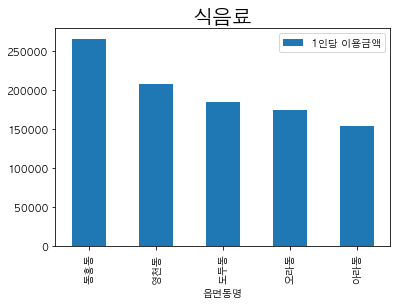

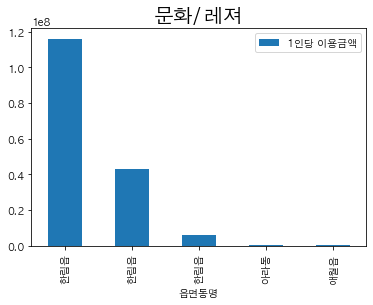

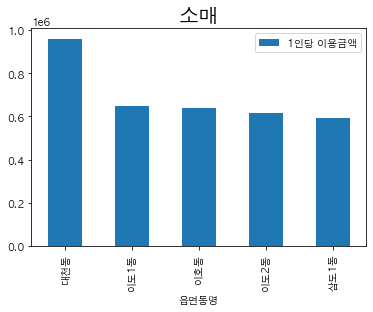

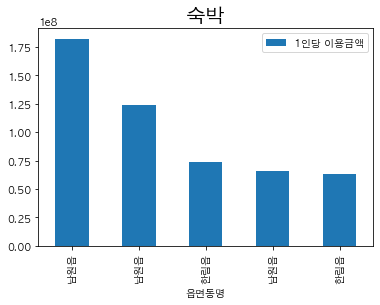

In [67]:
#spring
my_list=["식음료","문화/레져","소매","숙박"]
for con in range(len(my_list)):
    condition = (china_spring.업종 == my_list[con]) # 조건식 작성
    chinese = (china_spring[condition].sort_values(by='1인당 이용금액',ascending = False))
    a=chinese[condition].head()
    b=a["읍면동명"]
    c=a["1인당 이용금액"]
    plot_a=pd.concat([b,c], axis=1)
    plot_chinese=plot_a.set_index('읍면동명')
    plot_chinese
    plot_chinese.plot(kind='bar')
    plt.title(my_list[con], fontsize='20')

<ipython-input-68-058cfa883cfb>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a=chinese[condition].head()


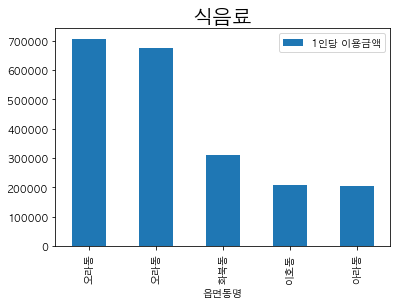

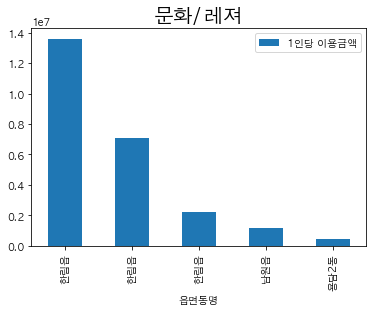

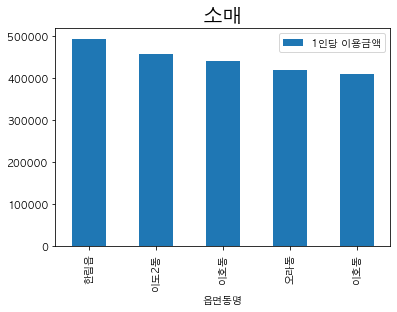

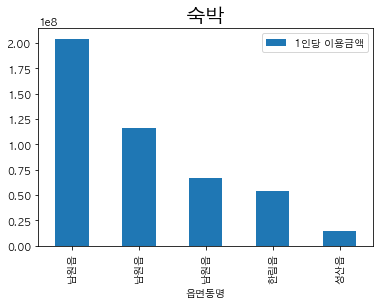

In [68]:
#summer
my_list=["식음료","문화/레져","소매","숙박"]
for con in range(len(my_list)):
    condition = (china_summer.업종 == my_list[con]) # 조건식 작성
    chinese = (china_summer[condition].sort_values(by='1인당 이용금액',ascending = False))
    a=chinese[condition].head()
    b=a["읍면동명"]
    c=a["1인당 이용금액"]
    plot_a=pd.concat([b,c], axis=1)
    plot_chinese=plot_a.set_index('읍면동명')
    plot_chinese
    plot_chinese.plot(kind='bar')
    plt.title(my_list[con], fontsize='20')

<ipython-input-69-f07aaaeb508e>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a=chinese[condition].head()


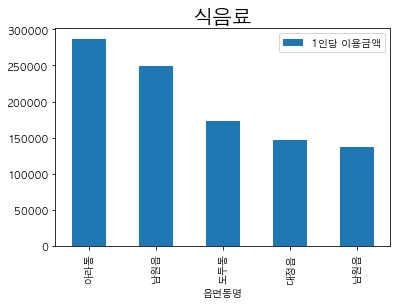

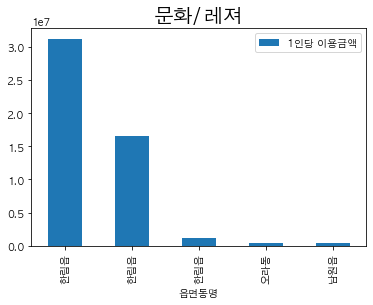

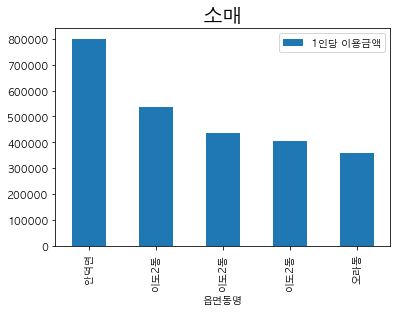

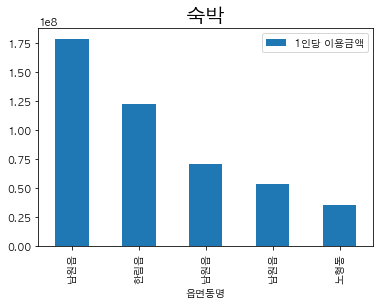

In [69]:
#fall
my_list=["식음료","문화/레져","소매","숙박"]
for con in range(len(my_list)):
    condition = (china_fall.업종 == my_list[con]) # 조건식 작성
    chinese = (china_fall[condition].sort_values(by='1인당 이용금액',ascending = False))
    a=chinese[condition].head()
    b=a["읍면동명"]
    c=a["1인당 이용금액"]
    plot_a=pd.concat([b,c], axis=1)
    plot_chinese=plot_a.set_index('읍면동명')
    plot_chinese
    plot_chinese.plot(kind='bar')
    plt.title(my_list[con], fontsize='20')

<ipython-input-70-59bd22c9ef6e>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a=chinese[condition].head()


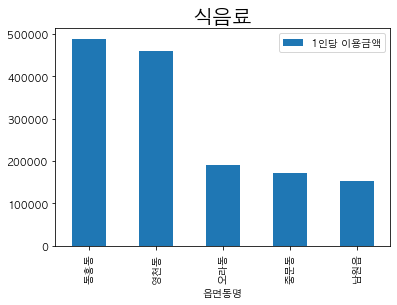

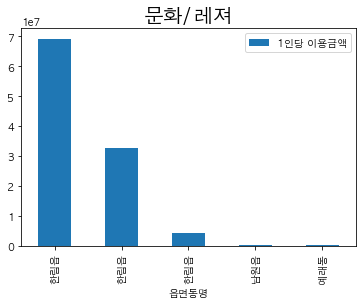

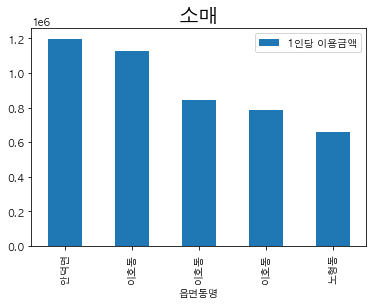

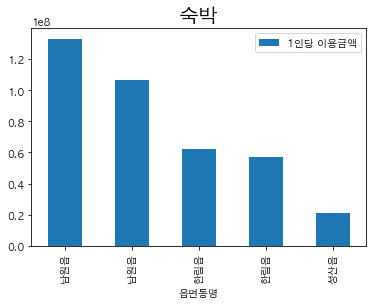

In [70]:
#winter
my_list=["식음료","문화/레져","소매","숙박"]
for con in range(len(my_list)):
    condition = (china_winter.업종 == my_list[con]) # 조건식 작성
    chinese = (china_winter[condition].sort_values(by='1인당 이용금액',ascending = False))
    a=chinese[condition].head()
    b=a["읍면동명"]
    c=a["1인당 이용금액"]
    plot_a=pd.concat([b,c], axis=1)
    plot_chinese=plot_a.set_index('읍면동명')
    plot_chinese
    plot_chinese.plot(kind='bar')
    plt.title(my_list[con], fontsize='20')